# Основы машинного обучения (ИАД)
## НИУ ВШЭ, 2021-2022 учебный год

### Домашнее задание №8

Соре, у меня завтра экзамен по макре. Кода немного, но я пыталась. Я устала с:

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, mean_squared_error

# Бустинг

## Градиентный бустинг своими руками (3 + 2* баллов)

Реализуйте алгоритм градиентного бустинга для регрессии. Напомним **основные формулы**.

Обозначим текущую композицию на $N-1$ шаге за $a_{N - 1}(x_i)$. Следующий базовый алгоритм $b_N(x_i)$ обучается на ответах $-\frac{\partial L(y_i, z)}{\partial z}\Bigl|_{z = a_{N - 1}(x_i)}$, где $L(y_i, z)$ — значение функции потерь на объекте при правильном ответе $y_i$ и предсказании $z$. Композиция на следующем шаге получается следующим образом:

$$
a_N(x_i) = a_{N-1}(x_i) + \nu\gamma_Nb_N(x_i)
$$

Здесь $\nu$ — гиперпараметр learning rate, $\gamma_N$ — оптимальный вес, настраиваемый на каждом шаге алгоритма, который можно найти по следующей формуле (обратите внимание на отсутствие $\nu$):

$$
\gamma_N = \mathrm{arg}\min_\gamma \frac{1}{\ell}\sum\limits_{i=1}^{\ell}L\left(y_i, a_{N - 1}(x_i) + \gamma b_N(x_i)\right)
$$

Можете принять $\gamma_N = 1$ для каждого $N$.

> Реализуйте нахождение оптимального $\gamma_N$ на каждом шаге, чтобы получить ещё 1 балл.


В качестве функции потерь возьмите **MSE**.

*Примечание. Вы можете использовать `DecisionTree` из `sklearn` и методы оптимизации из различных библиотек.*

In [2]:
# это может помочь вам для поиска оптимальных gamma
from scipy.optimize import minimize

In [3]:
class GradientBoosting:
    def __init__(self, n_estimators, max_depth, learning_rate=0.1):
        """
        PARAMETERS:
        n_estimators - number of trees in the ensemble
        max_depth - maximum depth of a tree
        learning_rate - coefficient by which new algorithm result is multiplied
        """
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.loss_by_iter = []
        self.trees_ = []
        self.loss_by_iter_test = []
        self.n_samples = n_samples
        self.tree = DecisionTreeRegressor(n_estimators = self.n_estimators, max_depth=self.max_depth, learning_rate = self.learning_rate)

    def MSE(self, y_pred, y):
        MSE = (((y_pred - y)**2).mean())
        return MSE
    def L(self, alpha, x_train, y_train):
        l = 0
        f = self.aN + alpha * self.tree.predict(x_train)
        for i, y in enumerate(y_train):
            loss += self.mse_loss(f_ab[i], y_train[i])

        loss = loss/len(y_train)

        return loss

    def fit(self, x, y):
        """
        INPUT:
        x - np.array of shape (k, d)
        y - np.array of shape (k,)
        """
        # Здесь нам нужно проитерироваться по n_estimators и обучить
        # соответствующее количество деревьев с помощью _fit_predict_tree(),
        # правильно обновляя y_new
        # Деревья нужно где-то сохранить, чтобы затем использовать в predict()
        # your code here
        self.a0 = y.mean()
        self.aN = self.a0
        for _ in range(self.n_estimators):
            y_new = y - self.aN
            self.aN += self._fit_predict_tree(x, y_new, y)

    def _fit_predict_tree(self, x, y):
        # Обучаем дерево и возвращаем его предикшн
        self.tree = DecisionTreeRegressor(max_depth=self.max_depth)
        self.tree.fit(x,y_new)
        self.trees.append(self.tree)
        
        self.alpha = minimize(self.L_a,  args=(x, y), x0=1).x
        self.alpha_s.append(self.alpha)
        # your code here
        return self.gamma * self.learning_rate * tree.predict(x)
        
    def predict(self, x):
        """
        INPUT:
        x - np.array of shape (m, d)
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        # Используем сохранённые деревья для расчёта агрегированного предикшна
        # your code here
        y_pred = self.a0 + self.learning_rate*np.sum([self.trees[i].predict(x)*self.alpha_s[i] for i, _ in enumerate(self.trees)], axis=0)
        return y_pred

Проверьте вашу реализацию на Boston dataset. 

> Подберите оптимальные гиперпараметры, чтобы победить RandomForestRegressor как в обычном случае, так и при нахождении оптимального шага **(не меняйте параметры сида)**. При необходимости воспользуйтесь GridSearch. За это вы получите ещё 1 балл.



In [4]:
boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [5]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_features=4, n_estimators=640, random_state=19052019)

rf.fit(X_train, y_train)
mean_squared_error(y_test, rf.predict(X_test))

9.63198271791959

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
np.random.seed(19052019)
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
# your code here


In [7]:
mean_squared_error(y_test, y_pred)

12.443738002909447

Для удобства проверяющего укажите, пожалуйста, реализовали ли вы нахождение оптимального шага?

- Да / Нет

## Прогнозируем задержки самолётов (2 балла)

Поработаем с задачей про задержки самолётов. На основании доступных данных о рейсе вам нужно определить, будет ли он задержан на 15 минут.
Воспользуйтесь любыми методами градиентного бустинга {`XGboost`, `catboost`, `LightGBM`} и `GridSearchCV` для достижения результата.

> Получите 1 балл за преодоление порога roc_auc_score 0.72 и ещё 1 балл за преодоление порога 0.74.



In [8]:
train = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw08-boosting-clustering-data/flight_delays_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw08-boosting-clustering-data/flight_delays_test.csv')

In [9]:
test.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377
4,c-6,c-6,c-3,1505,UA,ORD,STL,258


In [10]:
# Референс
from xgboost.sklearn import XGBClassifier

X_train = train[['Distance', 'DepTime']].values
y_train = train['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values
X_test = test[['Distance', 'DepTime']].values
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.3)

xgb_model = XGBClassifier()
xgb_model.fit(X_train_part, y_train_part)
roc_auc_score(y_valid, xgb_model.predict_proba(X_valid)[:, 1])

0.6961759892424921

In [11]:
X_train = train.drop('dep_delayed_15min', 1).values
y_train = train['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.3)
features_CBC = [0, 1, 2, 4, 5, 6]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [13]:
!pip install catboost
from catboost import CatBoostClassifier
cat = CatBoostClassifier(cat_features = features_CBC)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [14]:
from sklearn.model_selection import GridSearchCV
grid = {'learning_rate': [0.1, 0.13],
        'l2_leaf_reg': [2, 10, 15, 20]}

grid_search_result = GridSearchCV(estimator=cat, param_grid = grid)

In [ ]:
grid_search_result.fit(X_train, y_train)

Выходные данные были обрезаны до нескольких последних строк (5000).
0:	learn: 0.6280989	total: 105ms	remaining: 1m 45s
1:	learn: 0.5837450	total: 161ms	remaining: 1m 20s
2:	learn: 0.5497559	total: 249ms	remaining: 1m 22s
3:	learn: 0.5227914	total: 394ms	remaining: 1m 38s
4:	learn: 0.5052952	total: 530ms	remaining: 1m 45s
5:	learn: 0.4902816	total: 659ms	remaining: 1m 49s
6:	learn: 0.4810449	total: 721ms	remaining: 1m 42s
7:	learn: 0.4718406	total: 841ms	remaining: 1m 44s
8:	learn: 0.4651247	total: 980ms	remaining: 1m 47s
9:	learn: 0.4591554	total: 1.12s	remaining: 1m 50s
10:	learn: 0.4543848	total: 1.25s	remaining: 1m 52s
11:	learn: 0.4511603	total: 1.38s	remaining: 1m 53s
12:	learn: 0.4482859	total: 1.5s	remaining: 1m 54s
13:	learn: 0.4456170	total: 1.61s	remaining: 1m 53s
14:	learn: 0.4430895	total: 1.75s	remaining: 1m 54s
15:	learn: 0.4417063	total: 1.85s	remaining: 1m 53s
16:	learn: 0.4404511	total: 1.97s	remaining: 1m 54s
17:	learn: 0.4392083	total: 2.11s	remaining: 1m 54s
18:	lea

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7f2b4f050fd0>,
             param_grid={'l2_leaf_reg': [2, 10, 15, 20],
                         'learning_rate': [0.1, 0.13]})

In [ ]:
  print(" Results from Grid Search " )
  print("\n The best estimator across ALL searched params:\n",grid_search_result.best_estimator_)
  print("\n The best score across ALL searched params:\n",grid_search_result.best_score_)
  print("\n The best parameters across ALL searched params:\n",grid_search_result.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.8308

 The best parameters across ALL searched params:
 {'l2_leaf_reg': 2, 'learning_rate': 0.13}


In [15]:
CBS = CatBoostClassifier(cat_features = features_CBC,learning_rate=0.13, l2_leaf_reg = 2)
CBS.fit(X_train_part, y_train_part)
roc_auc_score(y_valid, CBS.predict_proba(X_valid)[:, 1])

0:	learn: 0.6291964	total: 363ms	remaining: 6m 2s
1:	learn: 0.5838291	total: 605ms	remaining: 5m 1s
2:	learn: 0.5485314	total: 858ms	remaining: 4m 45s
3:	learn: 0.5246382	total: 1.09s	remaining: 4m 32s
4:	learn: 0.5045880	total: 1.24s	remaining: 4m 7s
5:	learn: 0.4915328	total: 1.59s	remaining: 4m 23s
6:	learn: 0.4802917	total: 1.84s	remaining: 4m 21s
7:	learn: 0.4718949	total: 2.07s	remaining: 4m 16s
8:	learn: 0.4655353	total: 2.29s	remaining: 4m 11s
9:	learn: 0.4599235	total: 2.5s	remaining: 4m 8s
10:	learn: 0.4551969	total: 2.73s	remaining: 4m 5s
11:	learn: 0.4519187	total: 2.99s	remaining: 4m 6s
12:	learn: 0.4489773	total: 3.26s	remaining: 4m 7s
13:	learn: 0.4469155	total: 3.46s	remaining: 4m 3s
14:	learn: 0.4452063	total: 3.7s	remaining: 4m 2s
15:	learn: 0.4438999	total: 3.85s	remaining: 3m 56s
16:	learn: 0.4427136	total: 4.07s	remaining: 3m 55s
17:	learn: 0.4412938	total: 4.33s	remaining: 3m 56s
18:	learn: 0.4397568	total: 4.54s	remaining: 3m 54s
19:	learn: 0.4385206	total: 4.84s

0.7670130233986324

In [16]:
import lightgbm as ltb
X_train = train[['Distance', 'DepTime']].values
y_train = train['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values
X_test = test[['Distance', 'DepTime']].values
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.3)

LGB = ltb.LGBMClassifier()
grid_fro_lgb = {'boosting_type': ['gbdt','goss'],
                'num_leaves': [20,24,28,30,32],
                'max_depth': [-1, 2, 4, 6, 10],
                'learning_rate': [0.05, 0.1],
                'n_estimators': range(200, 400, 50)}

grid_search_result = GridSearchCV(estimator=LGB, param_grid = grid_fro_lgb)

In [ ]:
grid_search_result.fit(X_train, y_train)

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'boosting_type': ['gbdt', 'goss'],
                         'learning_rate': [0.05, 0.1],
                         'max_depth': [-1, 2, 4, 6, 10],
                         'n_estimators': range(200, 400, 50),
                         'num_leaves': [20, 24, 28, 30, 32]})

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_search_result.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_search_result.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_search_result.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 LGBMClassifier(max_depth=6, n_estimators=250, num_leaves=28)

 The best score across ALL searched params:
 0.81469

 The best parameters across ALL searched params:
 {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 250, 'num_leaves': 28}


In [17]:
LTB = ltb.LGBMClassifier(boosting_type='gbdt', learning_rate=0.1, max_depth = 6, n_estimators = 250, num_leaves = 28)
LTB.fit(X_train_part, y_train_part)
roc_auc_score(y_valid, LTB.predict_proba(X_valid)[:, 1])

0.6996704049478402

Лучший результат выдал catboost на все признаки - 0,75

# Кластеризация

## DBSCAN своими руками (3 + 2* баллов)


```
DBSCAN: Density-based spatial clustering of applications with noise
```


Реализуйте класс dbscan.

Алгоритм имеет два основных гиперпараметра:
1. `eps` &mdash; радиус рассматриваемой окрестности
2. `min_samples` &mdash; число соседей в окрестности

Для выполнения кластеризации DBSCAN точки делятся на основные точки, достижимые по плотности точки и выпадающие следующим образом:

- Точка $p$ является основной точкой, если по меньшей мере `min_samples` точек находятся на расстоянии, не превосходящем 
`eps` от неё. Говорят, что эти точки достижимы прямо из $p$.

-  Точка $q$ прямо достижима из $p$, если точка $q$ находится на расстоянии, не большем `eps`, от точки $p$, и $p$ — основная точка.
Точка $q$ достижима из $p$, если имеется путь 
$p_1,…,p_n$ где $p_1=p$ и $p_n=q$ , а каждая точка $p_{i+1}$ достижима прямо из $p_i$ (все точки на пути должны быть основными, за исключением $q$).

Все точки, не достижимые из основных точек, считаются выбросами.

Теперь, если $p$ является основной точкой, то она формирует кластер вместе со всеми точками (основными или неосновными), достижимыми из этой точки. Каждый кластер содержит по меньшей мере одну основную точку. Неосновные точки могут быть частью кластера, но они формируют его «край», поскольку не могут быть использованы для достижения других точек.


In [18]:
# Это может помочь вам для поиска дистанции между точками
from scipy.spatial import distance

In [19]:
# Рекомендации -- это только рекомендации
class dbscan:

        

Проверим себя на простом примере:

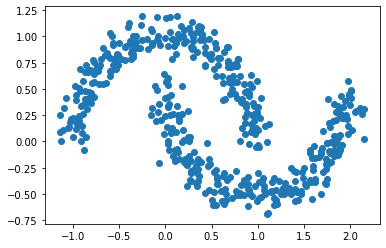

In [20]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd

X, _ = make_moons(n_samples=500, noise=0.1)
plt.scatter(X[:,0], X[:,1])
plt.show()

Кластеризуйте это с помощью своей версии DBSCAN:

In [26]:
# your code here


Референс:

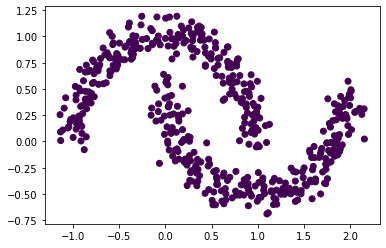

In [21]:
from sklearn.cluster import DBSCAN

clusters = DBSCAN(eps=0.2, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()


> Получите 1 балл за ещё один интересный пример кластеризации (в качестве референса используйте предоставленное изображение. Нужно несколько интересных соседствующих форм):



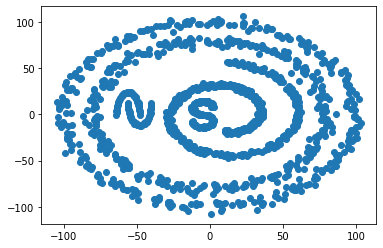

In [ ]:
# your code here


Или хотя бы что-нибудь такое: 

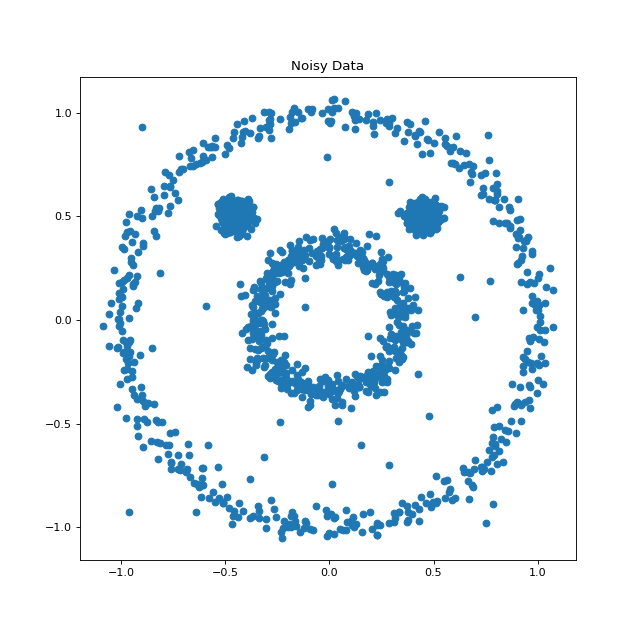

In [ ]:
# your code here



> Получите ещё 1 балл, если время работы вашего алгоритма больше референсного не более чем в 100 раз с учётом погрешности 3% от вашего времени:



In [ ]:
%%time
%%capture
clusters = DBSCAN(eps=0.2, min_samples=10).fit_predict(X)

In [ ]:
%%time
%%capture
clusters = dbscan(eps=0.2, min_samples=10).fit_predict(X)

## Применяем DBSCAN (3 балла)

__[1.5 балла]__ Возьмите колонки `Distance` и `DepTime` (из датасета о задержках самолётов). Запустите на тренировочной выборке на них DBSCAN. Нарисуйте облоко рассеивания с получившимися кластерами. Насколько много их вышло? 

In [27]:
# your code here  ლ(ಠ益ಠლ)
train = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw08-boosting-clustering-data/flight_delays_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw08-boosting-clustering-data/flight_delays_test.csv')

In [28]:
X_train = train[['Distance', 'DepTime']].values
y_train = train['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values
X_test = test[['Distance', 'DepTime']].values
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.3)


In [29]:
y_pred = DBSCAN(eps = 0.1, min_samples = 10).fit_predict(X_train)

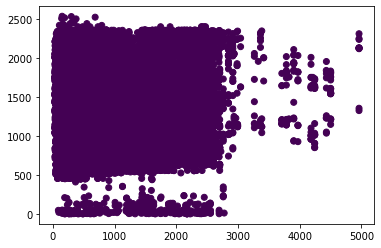

In [30]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_pred)
plt.show()

Попробуйте перебрать параметры `eps` и `min_samples` по решётке и нарисовать для каждой пары облако рассеивания. При каких параметрах шумовых точек оказывается больше всего? Почему так происходит? 

__Ответ:__ 

In [ ]:
# your code here   ⟅⎛ꌩωꌩ⎞⟆


__[1.5 балла]__ Добавьте в датасет новую категориальную переменную: номер кластера из DBSCAN и обучите Catboost со своими лучшими гиперпараметрами. Улучшилось ли качество модели на тестовой выборке? Как думаете, почему? 

In [ ]:
# your code here  ¯\_(ツ)_/¯


__Ответ:__

# Небольшие подарочки

**+0.1 балла** за фотографию того, как вы проводите лето на открытом воздухе

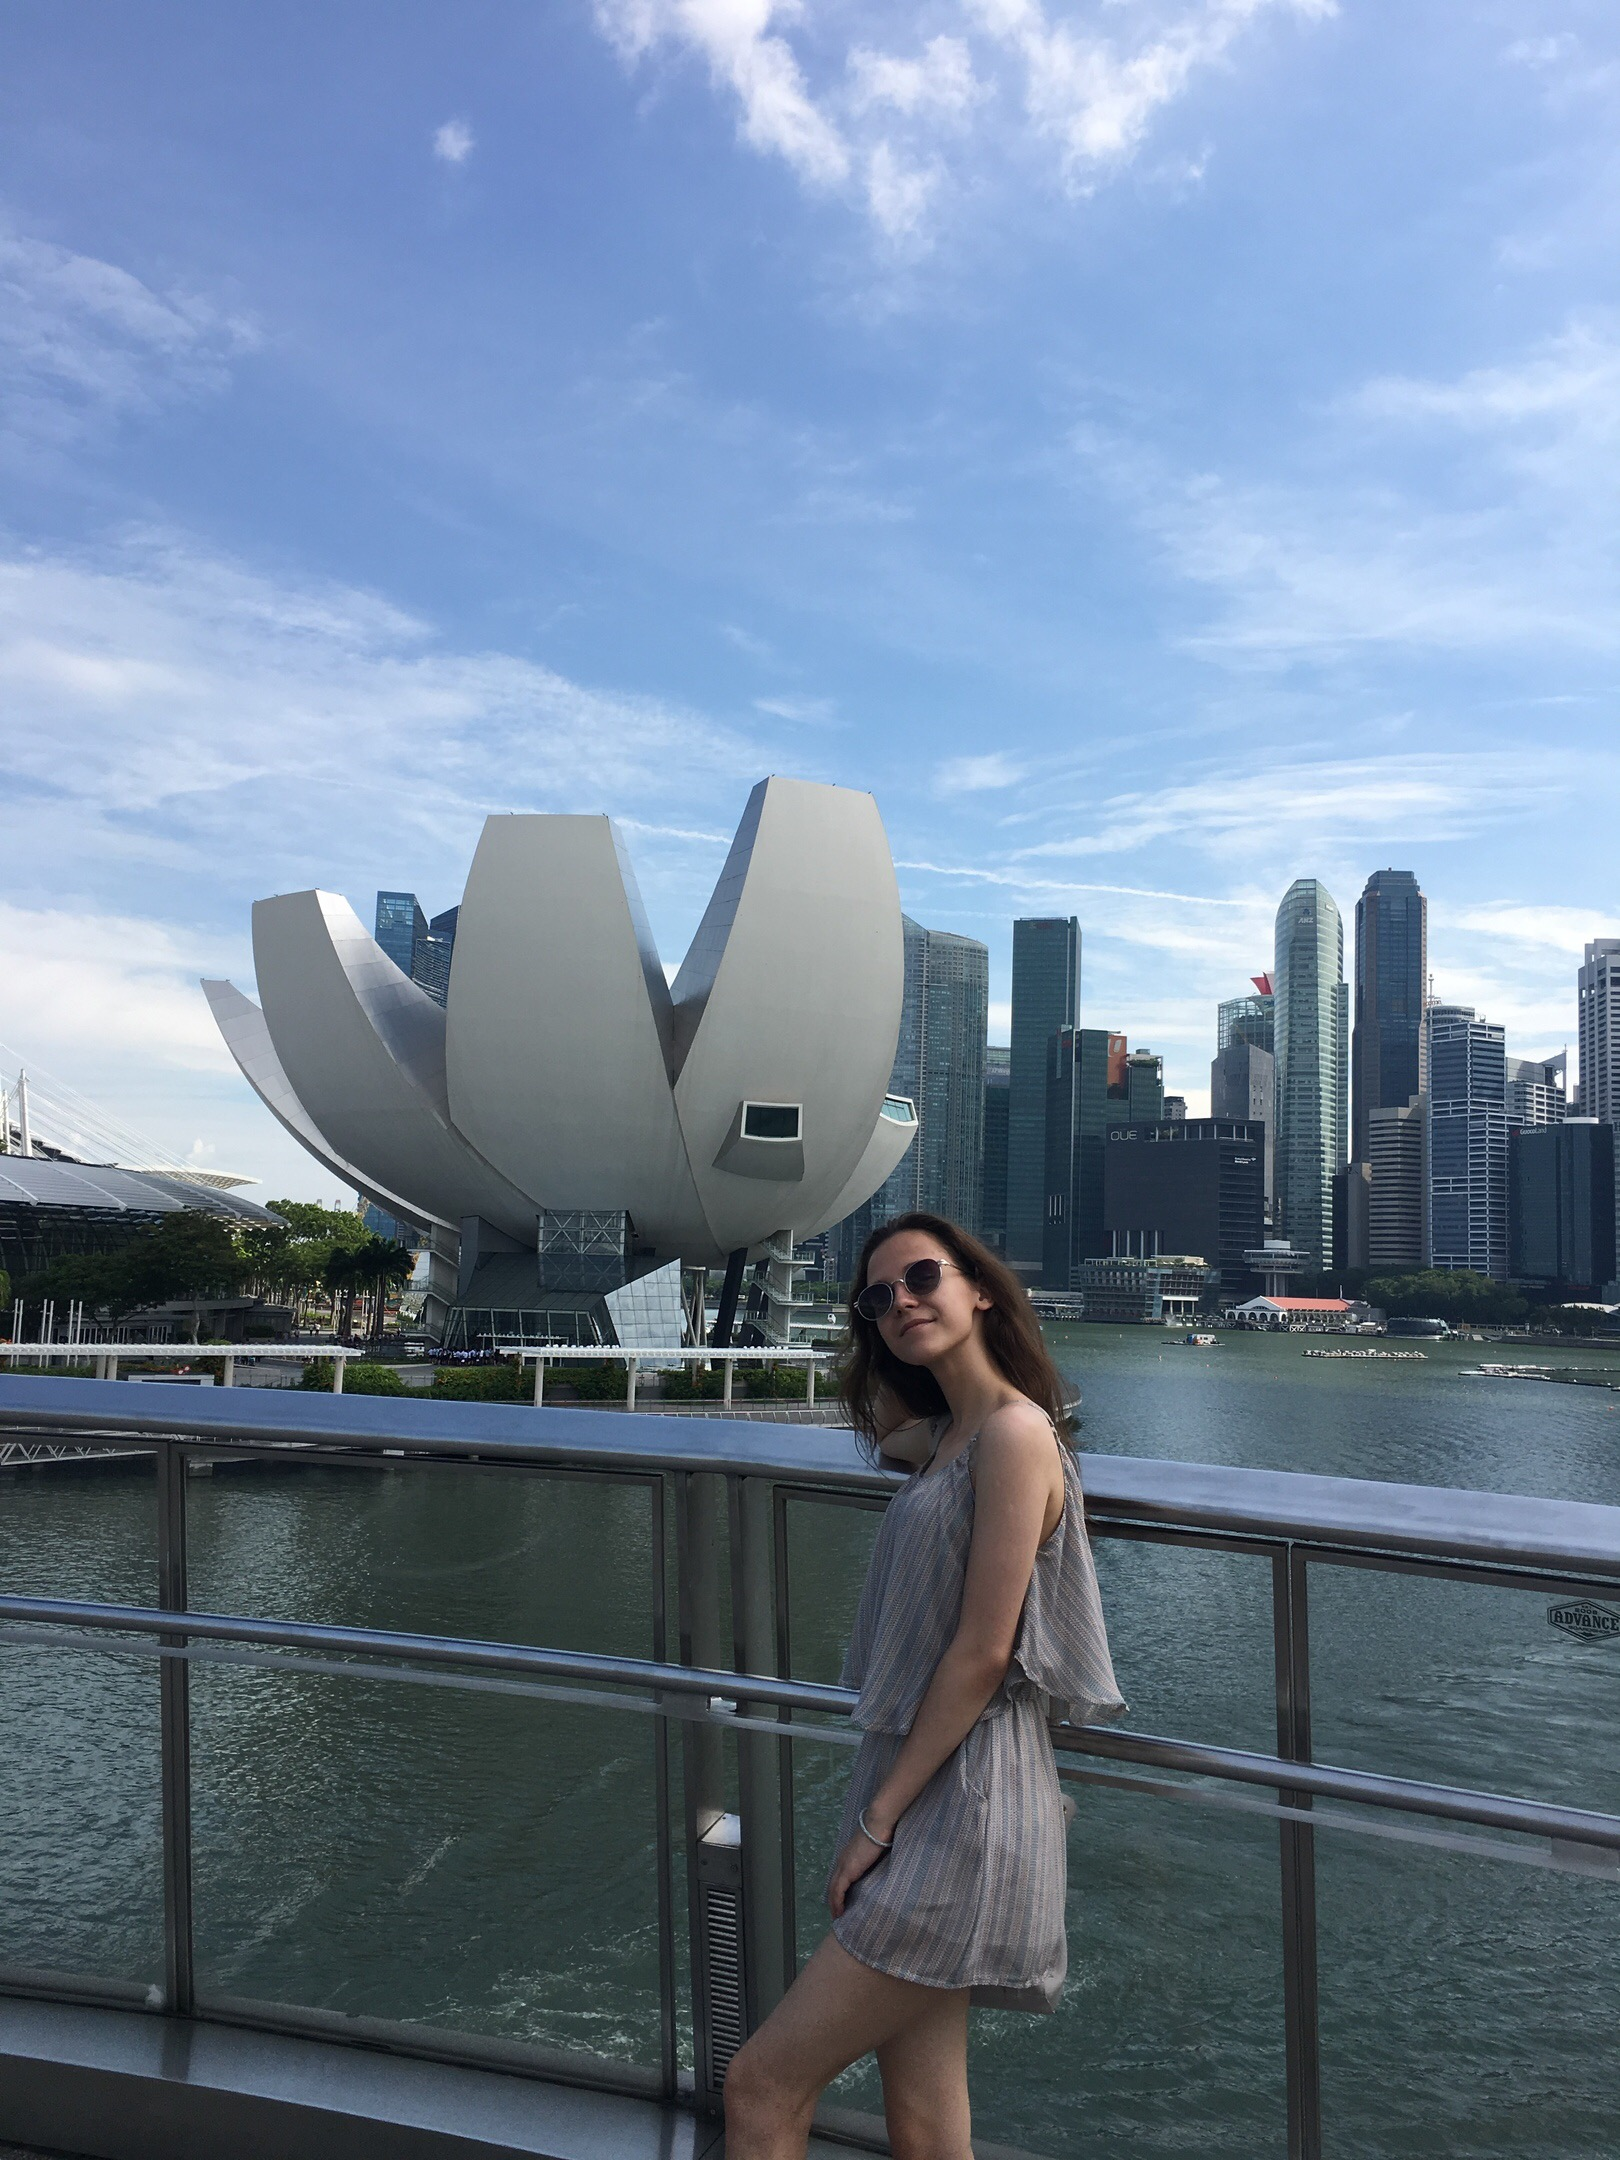

**+0.1 балла** за смешной мем по машинному обучению

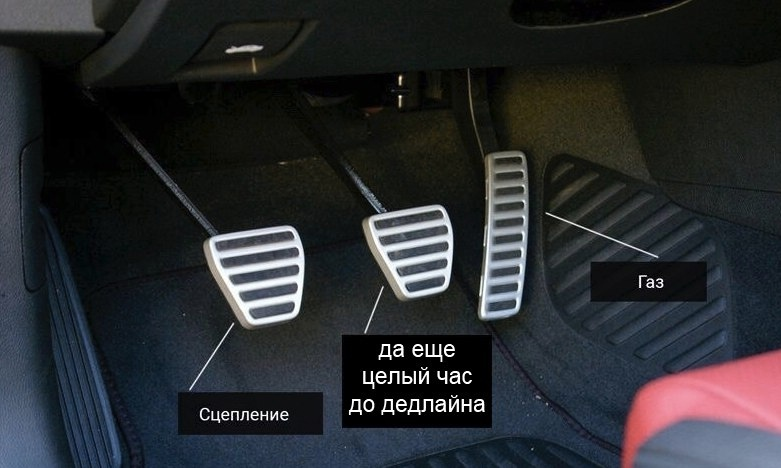

**+0.1 балла** за развернутый отзыв о курсе: ваших впечатлениях, сложностях и радостях, любимых темах и т.д.

Это наверное один из самых сложных курсов, не привыкла, что проверяется и теоретическое понимание курса, и способность писать код. Обычно упор шел на что-то одно. 
Я не могу сказать, что это плохо, наоборот лучше позволяет понять. Но как-то я не смогла вытянуть и теорию, и практику :с
Надеюсь за лето наверстаю! Спасибо за курс и отдельное спасибо ассистам за терпимое отноношение к порой очень глупым вопросам)